In [1]:
from bs4 import BeautifulSoup, NavigableString
from urllib import request, error
from urllib.parse import urljoin, urlparse

import itertools
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os

%matplotlib inline

In [2]:
def parse_url(url):
    try:
        print(url)
        html = request.urlopen(url)
        soup = BeautifulSoup(html, "html.parser")
        frame_srcs = [f["src"] for f in soup.find_all("frame")]
        if len(frame_srcs) == 0:
            return [soup]
        url_parts = urlparse(url)
        domain = url_parts.scheme + "://" + url_parts.netloc
        soups = [soup]
        for src in frame_srcs:
            path = urlparse(src)
            site_url = urljoin(domain, path.path) if path.scheme == "" else path.geturl()
            soups.append(parse_url(site_url))
        return list(itertools.chain.from_iterable(soups))
    except error.HTTPError as err:
        print(err)
        return []

In [3]:
def parse_tags(soups):
    tags = []
    for s in soups:
        if isinstance(s, NavigableString):
            continue
        tag = [tag.name for tag in s.find_all()]
        tags.append(tag)
    return list(itertools.chain.from_iterable(tags))

In [4]:
def to_tag_df(tags):
    return pd.DataFrame.from_records([[tag] for tag in tags], columns=["tag"])

In [5]:
LEGACY_SITES = [
    "http://abehiroshi.la.coocan.jp/",
    "http://www.takenet.or.jp/~hiro/",
    "http://www2u.biglobe.ne.jp/~akichan/",
    "http://www.geocities.co.jp/Milkyway-Sirius/9160/",
    "http://shojicam.com/",
    "http://www.ogaemon.com/",
    "http://museum.scenecritique.com/home/idoldream/index.html",
    "http://manpukuotahuku.seesaa.net/article/455698656.html",
]

In [6]:
leg_soups = [parse_url(url) for url in LEGACY_SITES]
leg_tags = [parse_tags(s) for s in leg_soups]
leg_dfs = [to_tag_df(tags) for tags in leg_tags]
tag_count_dfs = [df.groupby("tag").size().sort_values() for df in leg_dfs]

http://abehiroshi.la.coocan.jp/
http://abehiroshi.la.coocan.jp/menu.htm
http://abehiroshi.la.coocan.jp/top.htm
http://www.takenet.or.jp/~hiro/
http://www.takenet.or.jp/~hiro/index2.html
http://www.takenet.or.jp/~hiro/menew.html
http://www2u.biglobe.ne.jp/~akichan/


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


http://www.geocities.co.jp/Milkyway-Sirius/9160/
http://shojicam.com/
http://www.geocities.jp/leica_collecting/
http://www.geocities.jp/header04.htm
HTTP Error 404: Not Found
http://www.geocities.jp/navi04.html
HTTP Error 404: Not Found
http://www.geocities.jp/top04.html
HTTP Error 404: Not Found
http://shojicam.com/blank.html
http://www.ogaemon.com/
http://museum.scenecritique.com/home/idoldream/index.html
http://manpukuotahuku.seesaa.net/article/455698656.html


In [14]:
if not os.path.exists("image/legacy"):
    os.makedirs("image/legacy")

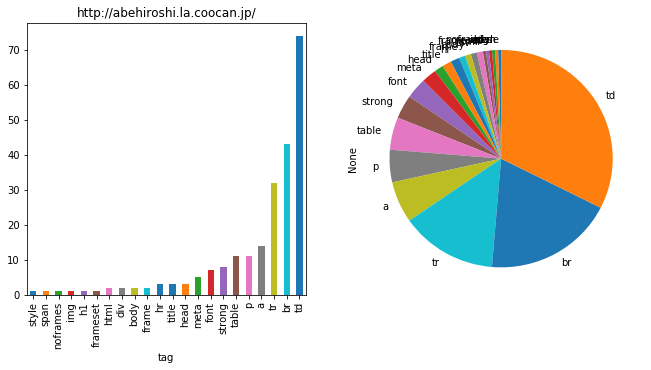

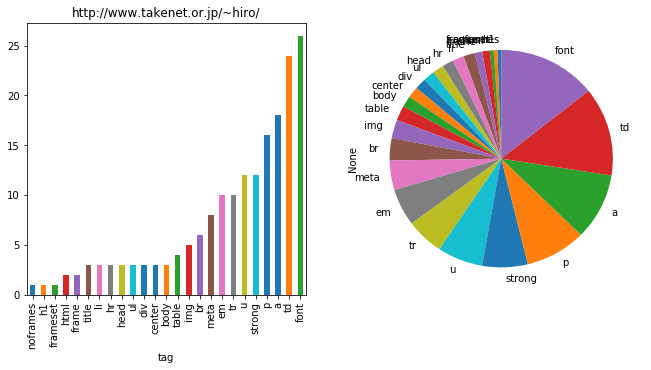

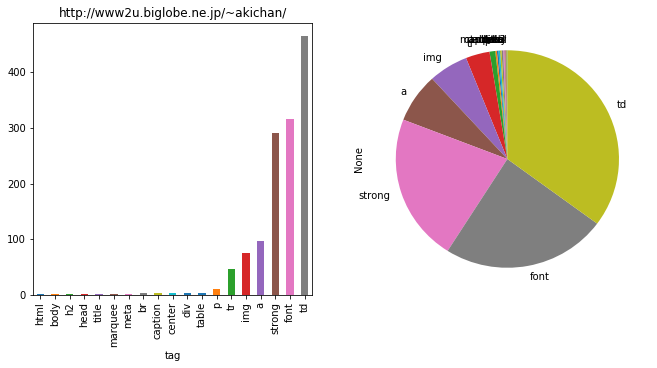

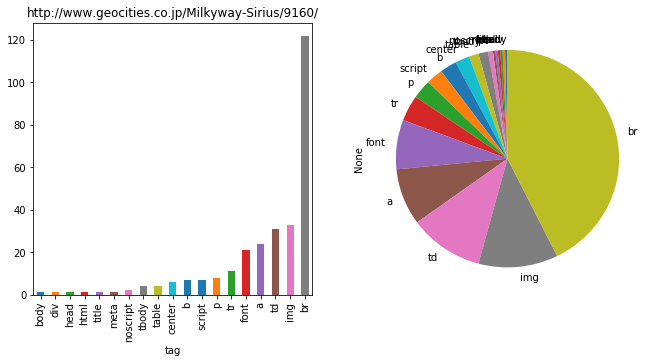

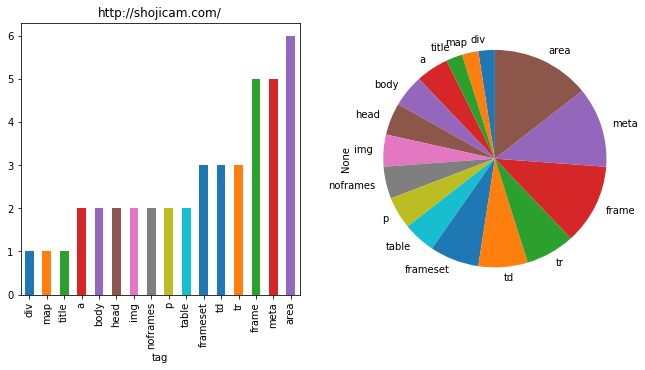

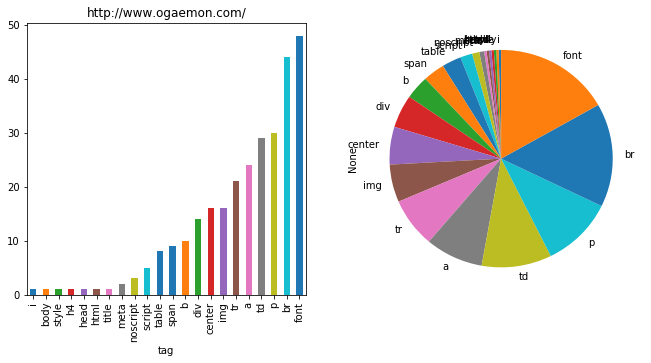

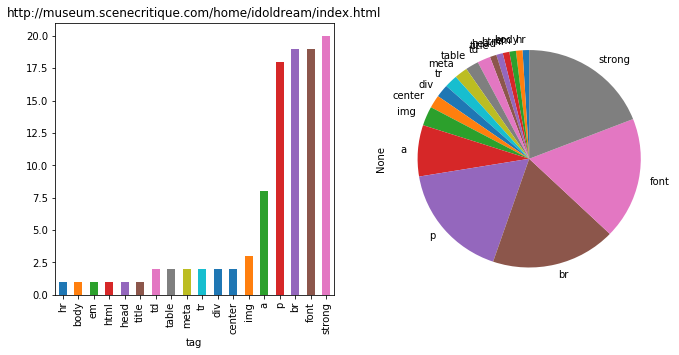

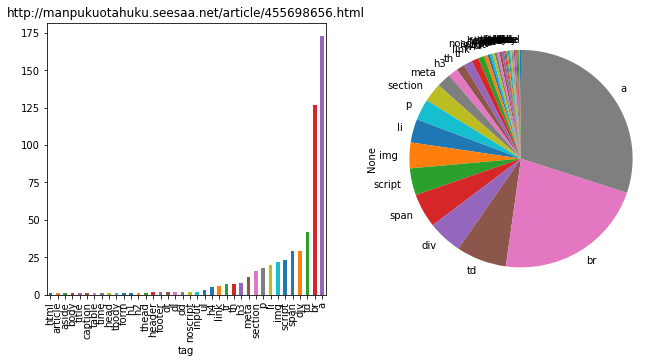

In [15]:
for i, (url, df) in enumerate(zip(LEGACY_SITES, tag_count_dfs)):
    plt.figure(figsize=(11, 5))
    gs = gridspec.GridSpec(1, 2)
    ax1 = plt.subplot(gs[0, 0])
    ax1.set_title(url)
    df.plot.bar(ax=ax1)
    ax2 = plt.subplot(gs[0, 1])
    df.plot.pie(ax=ax2, startangle=90)
    plt.savefig("image/legacy/site_{}_bar.png".format(i + 1))
    plt.show()

In [16]:
import sys

for url, df in zip(LEGACY_SITES, tag_count_dfs):
    print(url)
    df.to_csv(sys.stdout, sep='\t' )
    print("=================================")

http://abehiroshi.la.coocan.jp/
style	1
span	1
noframes	1
img	1
h1	1
frameset	1
html	2
div	2
body	2
frame	2
hr	3
title	3
head	3
meta	5
font	7
strong	8
table	11
p	11
a	14
tr	32
br	43
td	74
http://www.takenet.or.jp/~hiro/
noframes	1
h1	1
frameset	1
html	2
frame	2
title	3
li	3
hr	3
head	3
ul	3
div	3
center	3
body	3
table	4
img	5
br	6
meta	8
em	10
tr	10
u	12
strong	12
p	16
a	18
td	24
font	26
http://www2u.biglobe.ne.jp/~akichan/
html	1
body	1
h2	1
head	1
title	1
marquee	1
meta	2
br	3
caption	3
center	3
div	3
table	3
p	11
tr	46
img	76
a	97
strong	290
font	316
td	465
http://www.geocities.co.jp/Milkyway-Sirius/9160/
body	1
div	1
head	1
html	1
title	1
meta	1
noscript	2
tbody	4
table	4
center	6
b	7
script	7
p	8
tr	11
font	21
a	24
td	31
img	33
br	122
http://shojicam.com/
div	1
map	1
title	1
a	2
body	2
head	2
img	2
noframes	2
p	2
table	2
frameset	3
td	3
tr	3
frame	5
meta	5
area	6
http://www.ogaemon.com/
i	1
body	1
style	1
h4	1
head	1
html	1
title	1
meta	2
noscript	3
script	5
table	8
span	9
b	10
di

In [30]:
import functools
import numpy as np

tag_counts = list(map(lambda x: len(x.keys()), tag_count_dfs))
print(np.mean(tag_counts))

22.375


In [31]:
elem_counts = list(map(lambda x: x.values.sum(), tag_count_dfs))
print(np.mean(elem_counts))

378.5
